In [1]:
import networkx as nx
import matplotlib.pyplot as plt

2.Побудова графа по даним зі створеного txt-файлу

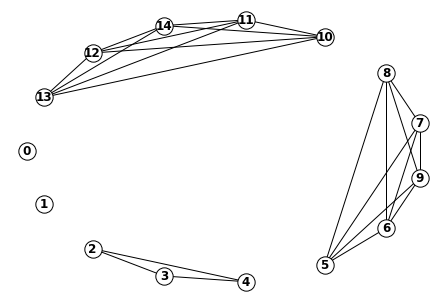

In [2]:
fname = r'D:\Университет\Прога\2 семестр\lab4\graph.txt'
g = nx.read_adjlist(fname, nodetype=int)
nx.draw_shell(g, with_labels=True, font_weight='bold', font_color='black', node_color='white', edgecolors='black')
plt.savefig('graph.png')

3.Побудова графа з налаштуванням розташування його вершин

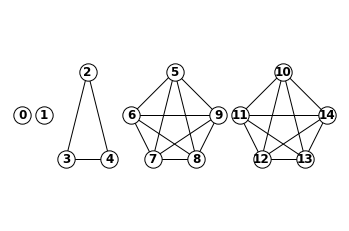

In [3]:
g = nx.Graph()
g.add_nodes_from(range(14))
E = [(2,3), (3,4), (4,2), (5, 6), (6, 7), (7, 8), (8, 9),(9, 5), (5, 7), (5, 8), (6, 8), (6, 9), 
     (7, 9),(10, 11), (11, 12), (12, 13), (13, 14),(14, 10), (10, 12), (10, 13), (11, 13), (11, 14), 
     (12, 14)]
g.add_edges_from(E)
pos = {0:(0,25), 1:(5,25), 2:(15,35), 3:(10,15), 4:(20,15), 5:(35,35), 6:(25,25), 7:(30,15), 
       8:(40,15), 9:(45,25), 10:(60,35), 11:(50,25), 12:(55,15), 13:(65,15), 14:(70,25)}
plt.axes().set_aspect('equal',adjustable='datalim')
nx.draw(g, pos=pos, with_labels=True, font_weight='bold', font_color = 'black', node_color = 'white', edgecolors='black')
plt.savefig('graph2.png')

4.Виведення інформації про кожну компоненту зв'язності побудованого на попередньому кроці графа

In [4]:
components = [g.subgraph(el).copy() for el in nx.connected_components(g)]
count = 1
for el in components:
    print(f'Component number {count}\nnumber of nodes:{el.number_of_nodes()}, number of edges:{el.number_of_edges()}, '
          f'degrees of nodes:{el.degree}, eccentricity of nodes:{nx.eccentricity(el)}, radius:{nx.radius(el)}, '
          f'diameter:{nx.diameter(el)}', end = ' \n')
    print('\n')
    count += 1

Component number 1
number of nodes:1, number of edges:0, degrees of nodes:[(0, 0)], eccentricity of nodes:{0: 0}, radius:0, diameter:0 


Component number 2
number of nodes:1, number of edges:0, degrees of nodes:[(1, 0)], eccentricity of nodes:{1: 0}, radius:0, diameter:0 


Component number 3
number of nodes:3, number of edges:3, degrees of nodes:[(2, 2), (3, 2), (4, 2)], eccentricity of nodes:{2: 1, 3: 1, 4: 1}, radius:1, diameter:1 


Component number 4
number of nodes:5, number of edges:10, degrees of nodes:[(5, 4), (6, 4), (7, 4), (8, 4), (9, 4)], eccentricity of nodes:{5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, radius:1, diameter:1 


Component number 5
number of nodes:5, number of edges:10, degrees of nodes:[(10, 4), (11, 4), (12, 4), (13, 4), (14, 4)], eccentricity of nodes:{10: 1, 11: 1, 12: 1, 13: 1, 14: 1}, radius:1, diameter:1 




5.Програмний пошук діаметра для кожної компоненти зв'язності

In [5]:
def central_v():
    ''' the function for finding of the central vertex of each connectivity component '''
    c = []
    for el in components:
        eccent = nx.eccentricity(el)
        diam = max(eccent.values())
        for v, e in eccent.items():
            if (e == diam):
                c.append(v)
                break
    return c

In [6]:
def diameter(bfs_list):
    ''' the function for finding of one diameter of each connectivity component from edges in bfs_list '''
    to = bfs_list[-1][1]
    frm = bfs_list[-1][0]
    route = list([frm, to])
    for item in reversed(bfs_list):
        if (item[1] == frm):
            frm = item[0]
            route = [item[0]] + route
    return route

In [7]:
c = central_v()
p = 0
diam_vertexes = []
for el in components:
    bfs =nx.bfs_edges(el, c[p])
    bfs_list = list(bfs)
    if not bfs_list:
        diam_vertexes.extend(el)
    else:
        diam = diameter(bfs_list)
        diam_vertexes.extend(diam)
    p += 1

In [8]:
diam_edges = []
for el in range(0, len(diam_vertexes)-1):
    edge = (diam_vertexes[el], diam_vertexes[el+1])
    if (edge in g.edges()):
         diam_edges.append(edge)

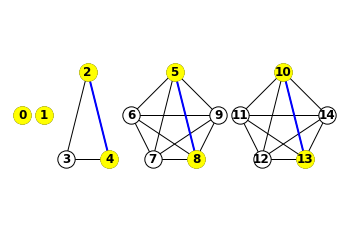

In [11]:
plt.axes().set_aspect('equal',adjustable='datalim')
nx.draw(g, pos=pos, with_labels=True, font_weight='bold', font_color = 'black', node_color = 'white', edgecolors='black')
nx.draw_networkx_nodes(g, pos=pos, nodelist=diam_vertexes, node_color='yellow')
nx.draw_networkx_edges(g, pos=pos, edgelist=diam_edges, edge_color='blue', width=2)

6.Програмна побудова глибинного кістякового лісу

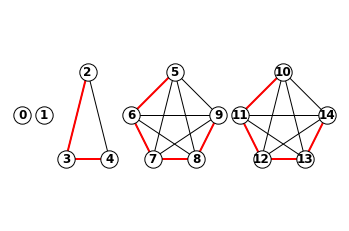

In [12]:
tree = nx.dfs_tree(g) 
tree_edges = list(tree.edges())
plt.axes().set_aspect('equal',adjustable='datalim')
nx.draw(g, pos=pos, with_labels=True, font_weight='bold', font_color = 'black', node_color = 'white', edgecolors='black')
nx.draw_networkx_edges(g, pos=pos, edgelist=tree_edges, edge_color='red', width=2)